# Idan Chen project - Personal Key Indicators of Heart Disease

![logo](logo.png)

#### imports

In [2]:
# basic imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns = 40

# Unbalance data imports
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# ML imports
from sklearn.model_selection import train_test_split

# configurations imports -> don't forget it Igal :)
%config Completer.use_jedi = False

## load the data and show basic information

In [3]:
df = pd.read_csv('heart_2020_cleaned.csv')

In [4]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [6]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [7]:
df.isna().sum().sum()

0

In [42]:
df.HeartDisease.value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

## Basic visualisations for analysis

#### histplot of SleepTime devided to 24 bins (number of hours per day)

<AxesSubplot:xlabel='SleepTime', ylabel='Count'>

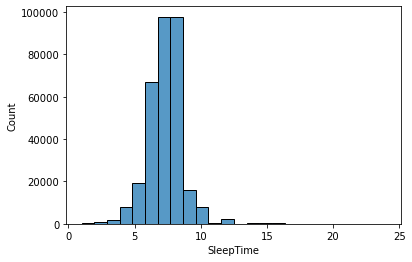

In [17]:
sns.histplot(data=df,x='SleepTime',bins=24)

#### histplot of BMI devided to 100 bins

<AxesSubplot:xlabel='BMI', ylabel='Count'>

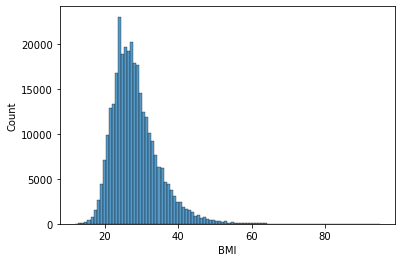

In [14]:
sns.histplot(data=df,x='BMI',bins=100)

#### Function that get df and column name and plot countplot with bar labels

In [19]:
def create_count_plot(x_size,y_size, df, column_name):
    fig = plt.figure(figsize=(x_size,y_size))
    plt.title(column_name,fontsize=15)
    ax = sns.countplot(x=df[column_name],
                       order=df[column_name].value_counts(ascending=False).index);
    abs_values = df[column_name].value_counts(ascending=False).values
    _ = ax.bar_label(container=ax.containers[0], labels=abs_values)

#### count plot of Age Category

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

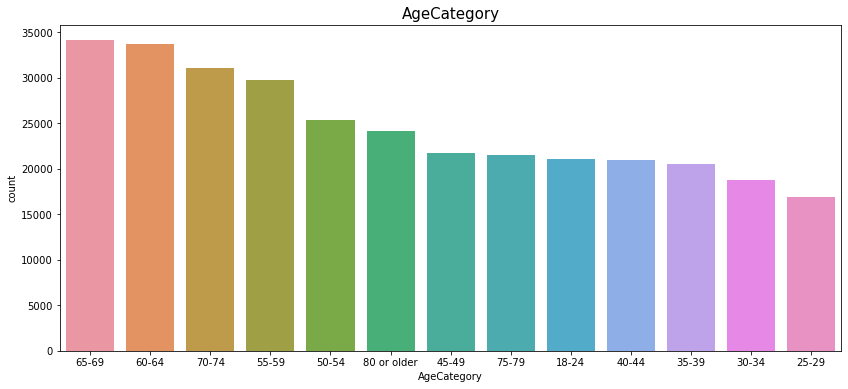

In [21]:
create_count_plot(x_size= 14, y_size = 6,df=df, column_name="AgeCategory")

#### count plot of Heart Disease

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

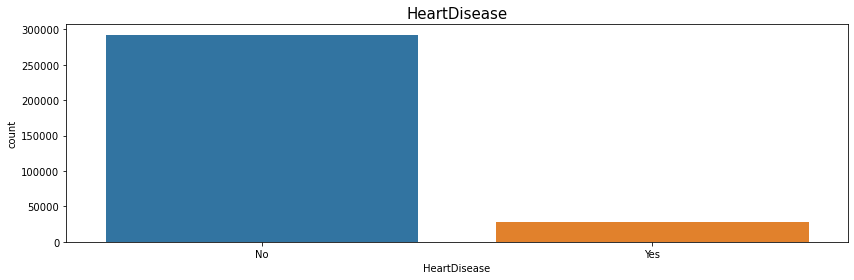

In [24]:
create_count_plot(x_size=14, y_size=4, df=df, column_name="HeartDisease")

#### count plot of Age Category

## Data Preparation 

###  Balance the data

In [36]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('HeartDisease',axis=1), df['HeartDisease'], test_size=0.33, random_state=42)

In [33]:
sum(y_train=="No")

196037

In [35]:
sum(y_train=="Yes")

18225

In [37]:
ros = RandomOverSampler()
X_ros_over, y_ros_over = ros.fit_resample(X_train, y_train)

In [34]:
print(f"sum of y_ros_over: {sum(y_ros_over=='Yes')}")
print(f"sum of X_ros_over: {sum(X_ros_over=='No')}")

sum of y_ros_over: 196037


TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [38]:
sum(X_ros_over=="No")

TypeError: unsupported operand type(s) for +: 'int' and 'str'

###  Dummy variables for categorical variables

In [ ]:
lst_of_dummy_variables = ['HeartDisease','Smoking','AlcoholDrinking','Stroke','DiffWalking','Sex','AgeCategory','Race','Diabetic','PhysicalActivity','GenHealth','Asthma','KidneyDisease','SkinCancer']

In [52]:
pd.get_dummies(df['Sex'],drop_first=True)

,Female,Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
319790,0,1
319791,0,1
319792,1,0
319793,1,0


,BMI,PhysicalHealth,MentalHealth,SleepTime
BMI,1.000000,0.109788,0.064131,-0.051822
PhysicalHealth,0.109788,1.000000,0.287987,-0.061387
MentalHealth,0.064131,0.287987,1.000000,-0.119717
SleepTime,-0.051822,-0.061387,-0.119717,1.000000


### see the data after the Preparation

In [16]:
df.head(1)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.6,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

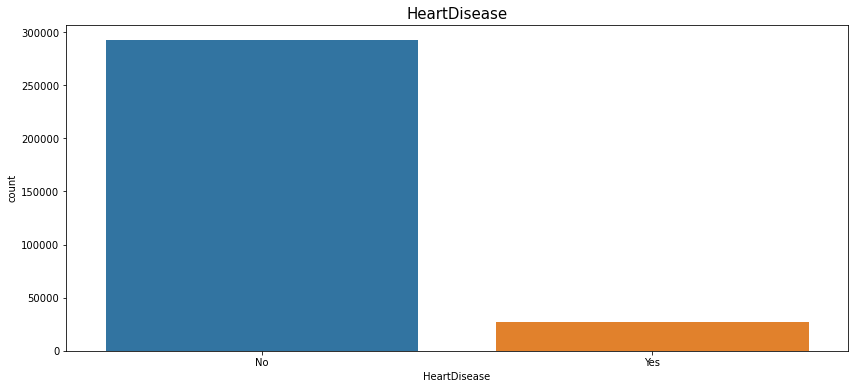

In [18]:
create_count_plot(df=df, column_name="HeartDisease")

## Model Training

## SUMMARY

# Finish!